# KNN
- Iris dataset
- 2 features
- Multiclass

In [1]:
import os, sys, pathlib
UTILS_FOLDER = 'T00 - Utils'
curPath = os.getcwd()
parPath = pathlib.Path(curPath).parent
utilPath = os.path.join(parPath, UTILS_FOLDER)
for p in [curPath, str(parPath), utilPath]:
    sys.path.append(p)

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from utils import plot_ds
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Read data
iris = datasets.load_iris()

# Extract the last 2 columns
X = iris.data[:, 2:4]
y = iris.target

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
param = "ex4"
paramSetAll = {
    "ex1": {"n_neighbors": 1, "p": 2, "algorithm": "auto",},
    "ex2": {"n_neighbors": 3, "p": 2, "algorithm": "auto",},
    "ex3": {"n_neighbors": 5, "p": 2, "algorithm": "auto",},
    "ex4": {"n_neighbors": 5, "p": 1, "algorithm": "auto",},
}
paramValue = paramSetAll[param]

# Creating model
knn = KNeighborsClassifier(**paramValue)

Misclassified examples: 1
Accuracy score: 0.9777777777777777


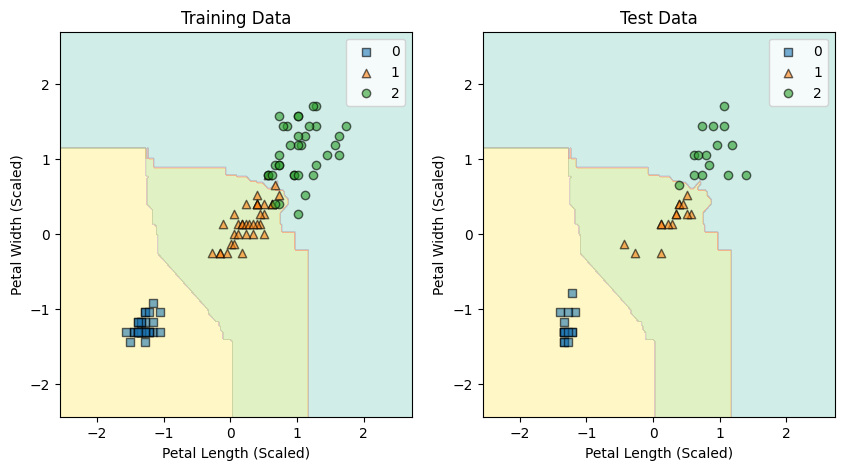

In [5]:
# Training
knn.fit(X_train_std, y_train)

# Prediction
y_pred = knn.predict(X_test_std)

# Misclassification from the test samples
sumMiss = (y_test != y_pred).sum()

# Accuracy score from the test samples
accuracyScore = accuracy_score(y_test, y_pred)

print(f"Misclassified examples: {sumMiss}")
print(f"Accuracy score: {accuracyScore}")

# Plot decision regions
plot_ds(X_train_std, X_test_std, y_train, y_test, knn)